<a href="https://colab.research.google.com/github/manisankar29/Face_recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installing face_recognition library**

In [1]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566171 sha256=d0e9c4e11b3d272aceb0991e7e334c46c3992c866202ede6e6b6b66dac473480
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


## **Import necessary libraries**

In [5]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

## **Training images with known faces**

In [7]:
face_1 = face_recognition.load_image_file("/content/bill.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("/content/elon.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("/content/sundar.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
    face_1_encoding,
    face_2_encoding,
    face_3_encoding
]

known_face_names = [
    "Bill Gates",
    "Elon Musk",
    "Sundar Pichai"
]

print("Training of images and creating profiles done successfully")

Training of images and creating profiles done successfully


## **Testing the unknown face with known faces**

Elon Musk


<ipython-input-15-2bf28b9ce98f>:21: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


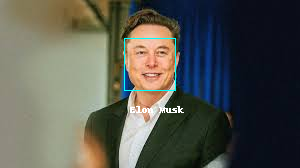

In [15]:
unknown_image = face_recognition.load_image_file("/content/unknown.jpeg")

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    print(name)
    text_width, text_height = draw.textsize(name)
    draw.text((left+6, bottom-text_height+25), name, fill=(255, 255, 255, 255))

del draw
display(pil_image)